In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(123)

# 1. Power Analysis

In [ ]:
from statsmodels.stats.power import zt_ind_solve_power


# parameters for power analysis

effect = 0.05 # MDE
alpha = 0.05
power = 0.8

# perform power analysis
result = zt_ind_solve_power(effect, power = power, alpha = alpha)
print('Sample Size: ', round(result))

Sample Size:  6279


Total sample size required i.e **Control + Treatment** group is around 12558 ( 6279 x 2 )

You can calculate the days required by dividing the total sample size with average number of user that come to your website in one day
Duration = Total sample size / avg number of users in a day

# 2. Data Generation process
Variables to be simulated:
1. userid
2. group
5. converted


We are intentionally adding a little variation in the number of participants to signal a potential Sample Ratio Mismatch, SRM

In [ ]:
# variable 1 : userid
user_id_control = list(range(1,6501))  # 6500 participants in control
user_id_treatment = list(range(6501, 12701)) #  6200 participants in treatment

print("Sample list of user id's in control (first 5) : " , user_id_control[:5])
print("Sample list of user id's in treatment (first 5): " , user_id_treatment[:5])

Sample list of user id's in control (first 5) :  [1, 2, 3, 4, 5]
Sample list of user id's in treatment (first 5):  [6501, 6502, 6503, 6504, 6505]


In [ ]:
# variable 2 : Group

control_status = ['control']*6500
treatment_status = ['treatment']*6200

print("First 5 values in Control list: ", control_status[:5])
print("First 5 values in Treatment list: ",  treatment_status[:5])

First 5 values in Control list:  ['control', 'control', 'control', 'control', 'control']
First 5 values in Treatment list:  ['treatment', 'treatment', 'treatment', 'treatment', 'treatment']


In [ ]:

# Variable 4 : converted
converted_choice = [True, False]
converted_control = np.random.choice(converted_choice, 6500, p=[0.18, 0.82])
converted_treatment = np.random.choice(converted_choice, 6200, p=[0.2, 0.8])

print("First 5 values for converted list control:" , converted_control[:5])
print("First 5 values for converted list treatment:", converted_treatment[:5])

First 5 values for converted list control: [False False False False False]
First 5 values for converted list treatment: [ True False False False False]


### Construct our Control group


*  user_id_control
*  version
*  converted_control









In [ ]:
raw_control = {'User_id':user_id_control,
                 'Version':control_status,
               'Converted' : converted_control
                }

control_group = pd.DataFrame(data=raw_control)
control_group.head()

,User_id,Version,Converted
0,1,control,False
1,2,control,False
2,3,control,False
3,4,control,False
4,5,control,False


### Construct our treatment group


*  user_id_treatment
*  version
*  converted_treatment


In [ ]:
raw_treatment = {'User_id':user_id_treatment,
                 'Version':treatment_status,
               'Converted' : converted_treatment
                }

treatment_group = pd.DataFrame(data=raw_treatment)
treatment_group.head()

,User_id,Version,Converted
0,6501,treatment,True
1,6502,treatment,False
2,6503,treatment,False
3,6504,treatment,False
4,6505,treatment,False


In [ ]:
# combine these two datasets
df = control_group.append(treatment_group)

# randomize the orders using df.sample(frac=1)
# The frac keyword argument: specifies the fraction of rows to return in the random sample
# so frac=1 means return all rows (in random order).
final_data = df.sample(frac=1).reset_index(drop=True)
final_data.head()

,User_id,Version,Converted
0,12065,treatment,True
1,4447,control,False
2,5336,control,False
3,97,control,False
4,7640,treatment,False


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12700 entries, 0 to 12699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_id    12700 non-null  int64 
 1   Version    12700 non-null  object
 2   Converted  12700 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 211.0+ KB


# 3. SRM Check and Data Analysis

In [ ]:
from scipy.stats import chisquare
# 12700
chisquare([6500,6200], f_exp=[6350,6350])

Power_divergenceResult(statistic=7.086614173228346, pvalue=0.007766183483219328)

### why Chi-Square test ( goodness of fit ) ?





* The chi-square goodness of fit test is a statistical test used to determine if
observed categorical data fits an expected distribution.

* The test compares the observed frequencies of different categories with the expected frequencies to assess if there is a significant difference between them.

* Here are the steps to perform a chi-square goodness of fit test:

> Step 1: State the null and alternative hypotheses:
* Null hypothesis (H0): The observed data follows the expected distribution.
* Alternative hypothesis (Ha): The observed data does not follow the expected distribution.

>  Step 2 : Set the significance level (α) for the test. This value will determine the threshold for rejecting the null hypothesis. Commonly used values are 0.05 or 0.01.

>Step 3: Collect the observed data and determine the expected frequencies for each category.

> Step 4: Create a contingency table that displays the observed and expected frequencies for each category. The table should have one row for each category and two columns for observed and expected frequencies.

> Step 5: Calculate the chi-square test statistic (χ²). This is done by using the following formula for each category:
χ² = Σ [(Observed frequency - Expected frequency)² / Expected frequency]

> Step 6: Determine the degrees of freedom (df) for the test. It is calculated as the number of categories minus 1 (df = k - 1), where k is the number of categories.

> Step 7: Compare the calculated chi-square test statistic with the critical chi-square value from the chi-square distribution table using the degrees of freedom and the chosen significance level. If the calculated chi-square value is greater than the critical value, the null hypothesis is rejected. If it is smaller, the null hypothesis is not rejected.

> Step 8: Report the conclusion. If the null hypothesis is rejected, it means that there is evidence to suggest that the observed data does not follow the expected distribution. If the null hypothesis is not rejected, it means that there is no significant difference between the observed and expected data, and the observed data fits the expected distribution.

### Conclusion from Chi-Square Test

**Statistic** is the chisquare test statistic value

**P-value** is the p-value of the test

We set the alpha level at 0.001 to test Sample Ratio Mismatch. Since the p value is 0.008, that is, **p-value > alpha** We have to reject the null hypothesis and conclude no evidence of SRM.
In other words, the treatment assignment works as expected.

### Visualizations


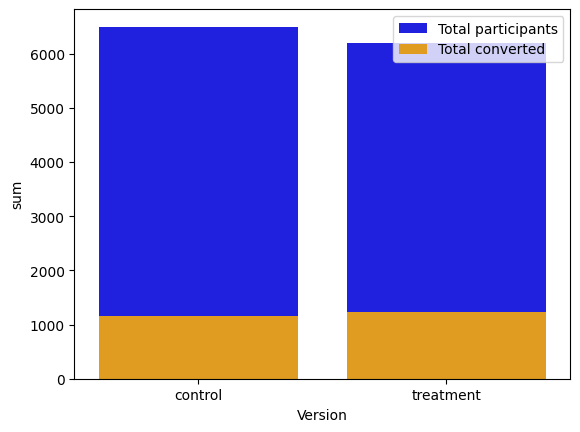

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

converted_acc_to_group = final_data.groupby('Version')['Converted'].agg(['sum','count']).reset_index()
sns.barplot(data=converted_acc_to_group, x='Version', y='count', color ='b',label='Total participants')
sns.barplot(data=converted_acc_to_group, x='Version', y='sum', color='orange', label='Total converted')
plt.legend()
plt.show()

## A/B testing

Consider you need to make the decision just based on all the data provided. That is we will assume that the **control group** is performing better unless the **treatment group** proves to be definitely better at a *alpha level* of 5%, what should your null and alternative hypotheses be? We can state your hypothesis in terms of words or in terms of Pnew and Pold, which are the converted rates for the control and treatment group.


> Ho : Pold >= Pnew

> Ha : Pold < Pnew

Assume under the null hypothesis, Pnew
 and Pold
 both have "true" success rates equal to the converted success rate regardless of group - that is Pnew
 and Pold
 are equal. Furthermore, assume they are equal to the converted rate.

Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.

Actual Conversion Rates

In [ ]:
# conversion rate for control
Pcontrol = final_data[final_data['Version'] == 'control']['Converted'].mean()
print("Conversion rate for conrol :", Pcontrol)

Conversion rate for conrol : 0.17723076923076922


In [ ]:
# conversion rate for treatment
Ptreatment = final_data[final_data['Version'] == 'treatment']['Converted'].mean()
print("Conversion rate for treatment :", Ptreatment)

Conversion rate for treatment : 0.19741935483870968


Conversion rates assuming the null hypothesis is True

In [ ]:
Pnew = final_data['Converted'].mean()
Pold = final_data['Converted'].mean()
print("Pnew == Pold (assuming Ho is true) :", (Pnew, Pold))

Pnew == Pold (assuming Ho is true) : (0.18708661417322833, 0.18708661417322833)


In [ ]:
# Nnew is count for participants in treatment group , Nold is count for participants in control group
Nold = final_data[final_data['Version'] == 'control'].shape[0]
Nnew = final_data[final_data['Version'] == 'treatment'].shape[0]
print(Nold, Nnew)

6500 6200


Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.

In [ ]:
# performing 10000 simulations
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, Pnew, Nnew)
    old_page_converted = np.random.binomial(1, Pold, Nold)
    npc = new_page_converted.mean()
    opc = old_page_converted.mean()
    diff = npc - opc
    p_diffs.append(diff)

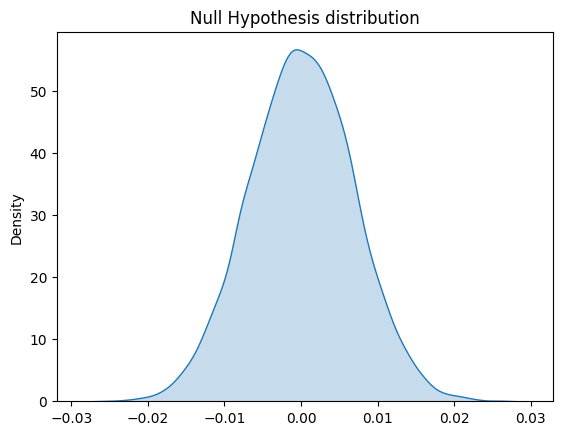

In [ ]:
sns.kdeplot(data=p_diffs,shade='True')
plt.title('Null Hypothesis distribution')
plt.show()

In [ ]:
# observed difference between control and treatment group
obs_diff = Ptreatment - Pcontrol
obs_diff

0.020188585607940457

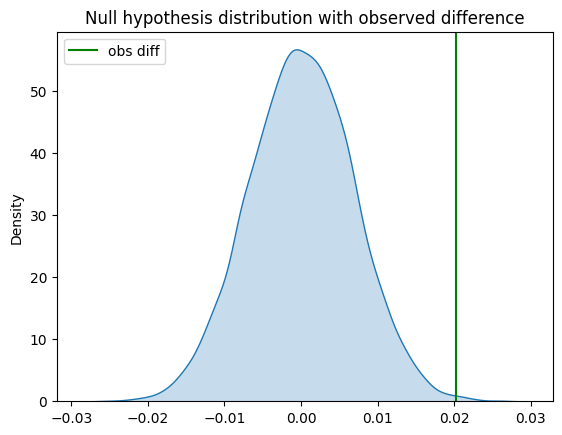

In [ ]:
sns.kdeplot(data=p_diffs, shade='True')
plt.axvline(x=obs_diff,color='g', label='obs diff')
plt.title('Null hypothesis distribution with observed difference')
plt.legend()
plt.show()

In [ ]:
#proportion of the p_diffs are greater than the actual difference observed
pvalue = (p_diffs > obs_diff).mean()#<---- This is the answer
print("P-value from the above hypothesis test :", pvalue)

P-value from the above hypothesis test : 0.0023


As Pvalue < alpha that is 0.0023 < 0.050

We can reject the null hypothesis Ho and conclude that there is a statistically significant difference

In [ ]:
p_diffs_alt = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, Ptreatment, Nnew)
    old_page_converted = np.random.binomial(1, Pcontrol, Nold)
    npc = new_page_converted.mean()
    opc = old_page_converted.mean()
    diff = npc - opc
    p_diffs_alt.append(diff)

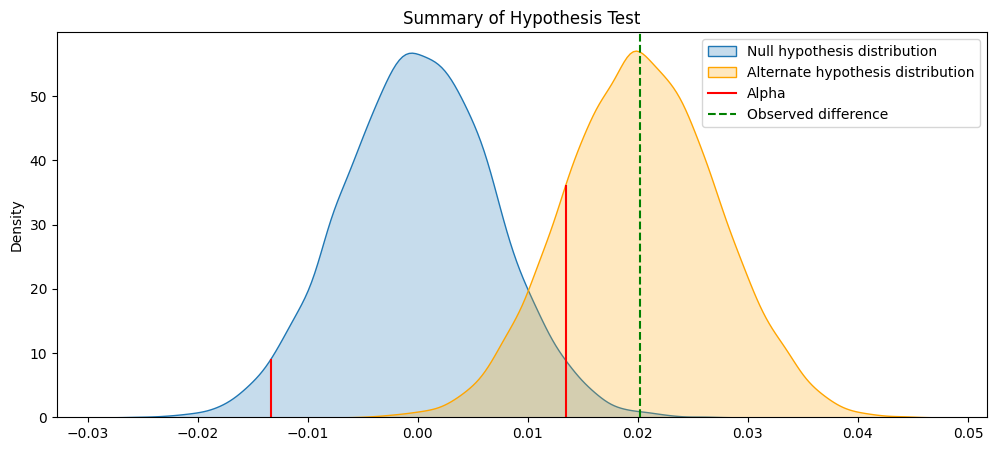

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=p_diffs, shade='True', label='Null hypothesis distribution')
sns.kdeplot(data=p_diffs_alt, shade='True', color='orange', label='Alternate hypothesis distribution')
plt.axvline(np.quantile(np.array(p_diffs),0.975), color='r', ymax=0.6)
plt.axvline(np.quantile(np.array(p_diffs),0.025), color='r', label='Alpha', ymax=0.15)
plt.axvline(x=obs_diff,color='green', label='Observed difference', linestyle='--')
plt.legend()
plt.title("Summary of Hypothesis Test")
plt.show()

Using statsmodels.api built-in z-test for validation

In [ ]:
import statsmodels.api as sm

converted_control = final_data[(final_data['Version'] == 'control') & (final_data['Converted'] == True)].shape[0]
N_control = final_data[final_data['Version'] == 'control'].shape[0]


converted_treatment = final_data[(final_data['Version'] == 'treatment') & (final_data['Converted'] == True)].shape[0]
N_treatment  = final_data[final_data['Version'] == 'treatment'].shape[0]

print(f"Total converted / Total Participants ( control group) : {converted_control} / {N_control}")
print(f"Total converted / Total Participants ( treatment group) : {converted_treatment} / {N_treatment}")

Total converted / Total Participants ( control group) : 1152 / 6500
Total converted / Total Participants ( treatment group) : 1224 / 6200


In [ ]:
count = np.array([converted_treatment, converted_control])
nobs = np.array([N_treatment, N_control])

In [ ]:
z_score, p_value = sm.stats.proportions_ztest(ncout, nobs, alternative='two-sided')
(z_score, p_value)

(2.91617149988572, 0.0035435565994046767)

### Conclusion
>The p-value associated with a 95% confidence level is 0.05. If [our] Z score is between -1.96 and +1.96, [our] p-value will be larger than 0.05, and you cannot reject your null hypothsis; In this case our z-score is equal to 2.91, which does not falls within -1.96 and 1.96. Therefore, we reject the null hypothesis.



The results of the pvalue from the built in method of hypothesis testing and the results from the simulations method of hypothesis testing validate each other. So we can conclude that we see statistically significant change.


## Regression Approach
>  In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.

> Since each row is either a conversion or no conversion, we can use the logistic regression method

> The goal is to use statsmodels to fit the logistic regression model. To see if there is a significant difference in conversion based on which group a customer receives. However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an group_page column, which is 1 when an individual receives the control and 0 if treatment.

In [ ]:
final_data.head()

,User_id,Version,Converted
0,12065,treatment,True
1,4447,control,False
2,5336,control,False
3,97,control,False
4,7640,treatment,False


In [ ]:
final_data['Converted'] = (final_data['Converted'] == True).astype(int)
final_data['Intercept'] = 1
final_data['group'] = final_data['Version'].apply(lambda x: 1 if x == 'treatment' else 0)
final_data.head()

,User_id,Version,Converted,Intercept,group
0,12065,treatment,1,1,1
1,4447,control,0,1,0
2,5336,control,0,1,0
3,97,control,0,1,0
4,7640,treatment,0,1,1


In [ ]:
import statsmodels.api as sm
logit = sm.Logit(final_data['Converted'] , final_data[['Intercept','group']])
result = logit.fit()
print(result)

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.481636
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                12700
Model:                          Logit   Df Residuals:                    12698
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 May 2023   Pseudo R-squ.:               0.0006945
Time:                        04:37:28   Log-Likelihood:                -6116.8
converged:                       True   LL-Null:                       -6121.0
Covariance Type:            nonrobust   LLR p-value:                  0.003548
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5352      0.032    -47.265      0.000      -1.599      -1.472
group          0.1327      0.

### Conclusions
> Coefficient Estimates: The coefficient for the Group variable is 0.1327. This coefficient represents the log-odds ratio of conversion between the treatment group and the control group. A positive coefficient suggests that the treatment group has a higher probability of conversion compared to the control group.

> Confidence Intervals and Hypothesis Testing: The standard error for the Group coefficient is 0.046. The z-statistic is 2.915, and the associated p-value is very small i.e 0.004. This indicates that the coefficient is statistically significant at conventional levels (e.g., alpha = 0.05). The 95% confidence interval for the Group coefficient ranges from 0.043 to 0.222, which means that we can be 95% confident that the true log-odds ratio lies within this interval.